# Business Understanding

* Uma loja de varejo deseja criar algumas métricas para acompanhar seus resultados, conforme a base de vendas e a base de clientes
* É necessário realizar todo o tratamento e união das bases para construção das seguintes métricas:
  * Departamentos mais vendidos
  * Média de preço com frete por nome de departamento
  * Quantidade de vendas por mês
  * Média de renda para cada tipo de canal de venda
  * Média de idade de clientes por bandeira
* Observações:
  - Houve um erro no sistema, para compras sem UF, considere o Estado do MS
  - Preço não pode ser maior que o preço com frete

# Data Understanding

## Setup

In [42]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Data Wrangling
import pandas as pd

# Data vizualization
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

## Dataset

In [2]:
# Carregando a base de dados de vendas
vendas = pd.read_excel("varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [3]:
# Carregando a base de dados de clientes
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


## Data Understanding

### Vendas

In [4]:
# Visualização dos tipos dos dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
# Verificando dados nulos
vendas.isna().sum()

idcompra               0
idcanalvenda           0
bandeira               0
Data                   0
Preço                302
Preço_com_frete        0
Nome_Departamento      0
estado               302
cliente_Log            0
dtype: int64

In [10]:
# Verificando dados duplicados
vendas.duplicated().sum()

0

In [7]:
# Tipos de bandeira
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [10]:
# Estados
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [16]:
# Departamentos
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [6]:
# Visualizando as categorias de venda
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

### Cliente

In [30]:
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [31]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [33]:
# Transformando renda em float
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


# Data Preparation

## Data Cleaning

In [8]:
# Substituindo APP por aplicativo no canal de venda
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [11]:
# Substituindo os estados nulos por MS, conforme pedido nas observações do negócio
vendas["estado"].fillna("MS", inplace=True)

In [13]:
# Adicionando a média dos preços para os valores nulos dos preços
media_preco = vendas["Preço"].mean()

vendas["Preço"].fillna(media_preco, inplace= True)

In [14]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [16]:
# Aplicando o filtro para que o preço não seja maior que o preço com frete
vendas = vendas.query("Preço < Preço_com_frete")

In [17]:
# Distribuição estatistica dos dados
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


In [34]:
# Juntando as duas bases de dados
vendas_cliente = vendas.merge(cliente, how= "left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


## Métricas do Negócio

In [24]:
# Departamentos mais vendidos
vendas.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades Domesticas,1366
5,Acessorios e Inovacoes,1243
6,Beleza e Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos de Limpeza,522


In [25]:
# Média do preço com frete por nome de departamento
round(vendas.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3469.38
1,Informatica,2159.78
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Telefones e Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte e Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos Musicais,834.61


In [28]:
vendas["mes"] = vendas["Data"].dt.month
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [29]:
# Quantidade de vendas por mês
vendas.groupby("mes").idcompra.nunique().sort_values(ascending=False)

mes
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

In [35]:
# Média de renda para cada canal de venda
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


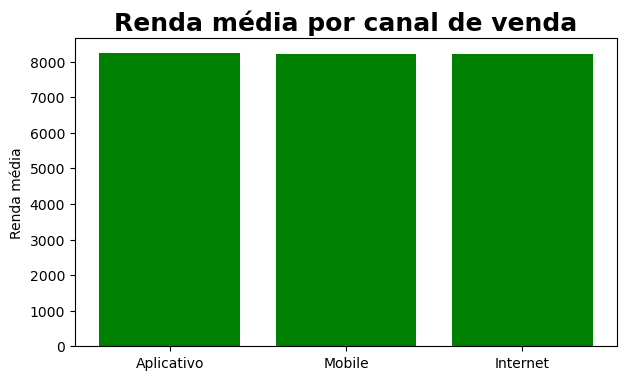

In [39]:
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Renda média")

plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

In [36]:
# Média de idade dos clientes por bandeira
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


In [44]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [40]:
# Vendas ao longo do tempo
venda_por_data = vendas.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


In [45]:
px.line(venda_por_data, x= "Data", y="idcompra")